# About the dataset 
The dataset seems to contain information about different mobile phone models along with their specifications such as price, rating, sim type, processor, RAM, battery, display, camera, memory card support, and operating syste 


# Load Required Libraries  

In [1]:
import pandas as pd
import numpy as np

import re

from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
grn = Style.BRIGHT + Fore.GREEN
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Color Pallets 

In [2]:
# Colors

CMAP_PALLET = ['#003f5c','#2f4b7c','#665191','#a05195','#d45087','#f95d6a','#ff7c43','#ffa600']

BG_WHITE = "#F3F1ED"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"

# Load the Dataset 

In [3]:
print(f'{blu}LOADING DATASET...')

data = pd.read_csv('sp.csv')

print(f'{grn}DATASET LOADED!')
print(f'{grn}Displaying DATASET!')
data.head()

LOADING DATASET...
DATASET LOADED!
Displaying DATASET!


,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,"₹14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,"₹24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      1020 non-null   object 
 1   price      1020 non-null   object 
 2   rating     879 non-null    float64
 3   sim        1020 non-null   object 
 4   processor  1020 non-null   object 
 5   ram        1020 non-null   object 
 6   battery    1020 non-null   object 
 7   display    1020 non-null   object 
 8   camera     1019 non-null   object 
 9   card       1013 non-null   object 
 10  os         1003 non-null   object 
dtypes: float64(1), object(10)
memory usage: 87.8+ KB


In [5]:
data.shape

(1020, 11)

# Insight
    - 1 numeric columns: Rating,  
    - 10 categorical columns 

# Idea  
 Rather than working with categorical data, I would like to preprocess above dataframe to turn in into a simple, easy to use dataframe, 
- Lets start by creating some helper functions  

# Helper Function 

In [6]:
print(f'{blu}LOADING HELPER FUNCTIONS...')

# Extract ROM
def rom(s):
    pattern = r"\d+\D+(\d+)"
    match = re.search(pattern, s)  # find a sequence of digits followed by a non-digit and capture the second sequence of digits
    if match:
        number = match.group(1)   # extract the captured second sequence of digits as a string
        return int(number)
    
# Extract RAM   
def ram(s):
    pattern = r"\d+"
    match = re.search(pattern, s)  # find a sequence of digits followed by a non-digit and capture the second sequence of digits
    if match:
        number = match.group()   # extract the captured second sequence of digits as a string
        return int(number) 

# Extract battery power
def battery(s):
    pattern = r"\d+\D+(\d+)"
    match = re.search(pattern, s)  # find a sequence of digits followed by a non-digit and capture the second sequence of digits
    if match:
        number = match.group(1)   # extract the captured second sequence of digits as a string
        return int(number)  

# Extract screen size
def screen_size(s):
    pattern = r"(\d+\.\d+) inches"
    match = re.search(pattern, s)
    if match:
        screen_size = float(match.group(1))
        return int(screen_size)

# Extract screen resolution width 
def width(s):
    pattern = r"(\d+) x (\d+) px"
    match = re.search(pattern, s)
    if match:
        width = int(match.group(1))
        return width

# Extract screen resolution height    
def height(s):
    pattern = r"(\d+) x (\d+) px"
    match = re.search(pattern, s)
    if match:
        height = int(match.group(2))
        return height

# Extract Frequency
def frequency(s):
    pattern = r"\b\d+\b(?=\s*Hz)"
    match = re.search(pattern, s)  # find a sequence of digits before the string " Hz"
    if match:
        number = match.group()  # extract the matched sequence of digits as a string
        return int(number)  

# Exercise
def android_version(s):
    pass
# complete this function and add android version column

print(f'{grn}HELPER FUNCTION LOADED!')


LOADING HELPER FUNCTIONS...
HELPER FUNCTION LOADED!


# Newly Created DataFrame

In [7]:
print(f'{blu}Creating a New Dataframe')
df = pd.DataFrame()
df['company'] = data['model'].apply(lambda x:x.split()[0])
df['price'] = data['price'].apply(lambda x: int(''.join(x[1:].split(','))))
df['rating'] = data['rating']
df['processor'] = data['processor'].apply(lambda x:x.split()[0])
df['ram'] = data['ram'].apply(ram)
df['battery'] = data['battery'].apply(battery)
df['screen_size'] = data['display'].apply(screen_size)
df['width'] = data['display'].apply(width)
df['height'] = data['display'].apply(height)
df['frequency'] = data['display'].apply(frequency)
df['rom'] = data['ram'].apply(rom)
# df['android_version']                     ----------------------------exercise-------------------------------------------

print(f'{grn}Data Preprocessed and new dataframe is created!')
print(f'{grn}Displaying Newly Created Dataframe!')

df.head()

Creating a New Dataframe
Data Preprocessed and new dataframe is created!
Displaying Newly Created Dataframe!


,company,price,rating,processor,ram,battery,screen_size,width,height,frequency,rom
0,OnePlus,54999,89.0,Snapdragon,12.0,100.0,6.0,1440.0,3216.0,120.0,256.0
1,OnePlus,19989,81.0,Snapdragon,6.0,33.0,6.0,1080.0,2412.0,120.0,128.0
2,Samsung,16499,75.0,Exynos,4.0,15.0,6.0,1080.0,2408.0,90.0,64.0
3,Motorola,14999,81.0,Snapdragon,6.0,NaN,6.0,1080.0,2400.0,120.0,128.0
4,Realme,24999,82.0,Dimensity,6.0,67.0,6.0,1080.0,2412.0,120.0,128.0


In [8]:
df.to_csv('Mobile Prices data Preprocessed.csv')

# Outcome 
Now we have only 2 categorical columns and rest are numerical columns, if you want to remove the null data, feel free to do so. 

In [9]:
print(f'{grn} About DATA')
print(f'{res}')
df.info()

 About DATA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   company      1020 non-null   object 
 1   price        1020 non-null   int64  
 2   rating       879 non-null    float64
 3   processor    1020 non-null   object 
 4   ram          1019 non-null   float64
 5   battery      801 non-null    float64
 6   screen_size  967 non-null    float64
 7   width        987 non-null    float64
 8   height       987 non-null    float64
 9   frequency    611 non-null    float64
 10  rom          997 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 87.8+ KB


# EDA  

In [10]:
import plotly.express as px

Company = df['company'].value_counts()

fig = px.bar(
    y=Company.values, 
    x=Company.index, 
    color=Company.index,
    color_discrete_sequence=px.colors.sequential.PuBuGn,
    text=Company.values,
    title='Company distribution',
    template='plotly_dark',
    width=1500,
    height=500
)

fig.update_layout(
    xaxis_title="Company",
    yaxis_title="count",
    font=dict(size=17, family="Franklin Gothic")
)

fig.show()


# NOTE  
Xiaomi and Samsung have the same count, followed by vivo and realme

In [11]:
Processor = df['processor'].value_counts()
fig = px.bar(y=Processor.values, 
             x=Processor.index, 
             color = Processor.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=Processor.values,
             title= 'Processor distribution',
             template= 'plotly_dark',
             width=1500, height=500)
fig.update_layout(
    xaxis_title="Processor",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))

fig.show()

# NOTE 

Snapdragon Processor is widely used


In [12]:
Rating = df['rating'].value_counts()
fig = px.bar(y=Rating.values, 
             x=Rating.index, 
             color = Rating.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=Rating.values,
             title= 'Rating distribution',
             template= 'plotly_dark',
             width=1500, height=500)
fig.update_layout(
    xaxis_title="Rating",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

# Note  
Ratings distribution is quite skewed towards left

In [13]:
fig=px.box(data_frame=df,y="price",x="company",color="company",color_discrete_sequence=["darkred","fuchsia","green","red","lightblue","darkorchid","gold","palegreen"],
          width=1500, height=500)
fig.update_layout(template="plotly_dark") 
fig.show()

In [14]:
fig=px.box(data_frame=df,y="price",x="processor",color="processor",color_discrete_sequence=["darkred","fuchsia","green","red","lightblue","darkorchid","gold","palegreen"],
          width=1500, height=500)
fig.update_layout(template="plotly_dark")                        
fig.show()

In [15]:
fig=px.scatter(df, y="rating",x="price",color_discrete_sequence=["#B0E471"],
               title="<b>Relationship between Rating and Price",
               width=750, height=500)
fig.update_layout(template="plotly_dark")
fig.update_layout(title_font_size=20)
fig.show()

In [16]:
fig=px.histogram(df,x="company",color="ram",title="<b>Count of Ram for every mobile company",
                color_discrete_sequence=px.colors.qualitative.Vivid,
                width=1500, height=500)
fig.update_layout(template="plotly_dark")
fig.update_layout(title_font_size=20)
fig.show()

In [17]:
fig=px.histogram(df,x="company",color="rom",title="<b>Count of ROM for every mobile company",
                color_discrete_sequence=px.colors.qualitative.Vivid,
                width=1500, height=500)
fig.update_layout(template="plotly_dark")
fig.update_layout(title_font_size=20)
fig.show()

In [18]:
fig=px.histogram(df,x="company",color="processor",title="<b>Count of Processor for every mobile company",
                color_discrete_sequence=px.colors.qualitative.Vivid,
                width=1500, height=500)
fig.update_layout(template="plotly_dark")
fig.update_layout(title_font_size=20)
fig.show()

In [19]:
df.head(5) 

,company,price,rating,processor,ram,battery,screen_size,width,height,frequency,rom
0,OnePlus,54999,89.0,Snapdragon,12.0,100.0,6.0,1440.0,3216.0,120.0,256.0
1,OnePlus,19989,81.0,Snapdragon,6.0,33.0,6.0,1080.0,2412.0,120.0,128.0
2,Samsung,16499,75.0,Exynos,4.0,15.0,6.0,1080.0,2408.0,90.0,64.0
3,Motorola,14999,81.0,Snapdragon,6.0,NaN,6.0,1080.0,2400.0,120.0,128.0
4,Realme,24999,82.0,Dimensity,6.0,67.0,6.0,1080.0,2412.0,120.0,128.0


In [20]:
df.isna().sum() 

company          0
price            0
rating         141
processor        0
ram              1
battery        219
screen_size     53
width           33
height          33
frequency      409
rom             23
dtype: int64

# Filling Missing Value 

In [21]:
df["rating"].fillna(df["rating"].mean(), inplace=True)  
df["battery"].fillna(df["battery"].mean() , inplace=True)
df["frequency"].fillna(df["frequency"].mean() , inplace=True)
df["height"].fillna(df["height"].mean() , inplace=True)
df["rom"].fillna(df["rom"].mean() , inplace=True)
df["width"].fillna(df["width"].mean() , inplace=True)
df["screen_size"].fillna(df["screen_size"].mean() , inplace=True)
df["ram"].fillna(df["ram"].mean() , inplace=True)



In [22]:
df.isna().sum() 

company        0
price          0
rating         0
processor      0
ram            0
battery        0
screen_size    0
width          0
height         0
frequency      0
rom            0
dtype: int64

# spliting data into X and y 

In [23]:
X = df.drop("price" , axis=1) 
X.head(5)  

,company,rating,processor,ram,battery,screen_size,width,height,frequency,rom
0,OnePlus,89.0,Snapdragon,12.0,100.000000,6.0,1440.0,3216.0,120.0,256.0
1,OnePlus,81.0,Snapdragon,6.0,33.000000,6.0,1080.0,2412.0,120.0,128.0
2,Samsung,75.0,Exynos,4.0,15.000000,6.0,1080.0,2408.0,90.0,64.0
3,Motorola,81.0,Snapdragon,6.0,46.329588,6.0,1080.0,2400.0,120.0,128.0
4,Realme,82.0,Dimensity,6.0,67.000000,6.0,1080.0,2412.0,120.0,128.0


In [24]:
y = df["price"]
y.head(3) 

0    54999
1    19989
2    16499
Name: price, dtype: int64

# converting data non numberic data into numberic   

In [25]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 
categorical_features = ["company" , "processor" ,"ram" , "screen_size" ]
one_hot = OneHotEncoder() 
transformer = ColumnTransformer([("one_hot" , one_hot , categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(X)  
transformed_X   

<1020x135 sparse matrix of type '<class 'numpy.float64'>'
	with 10200 stored elements in Compressed Sparse Row format>

In [26]:
import pandas as pd
dense_array = transformed_X.toarray()
transformed_X = pd.DataFrame(dense_array)
transformed_X   



,0,1,2,3,4,5,6,7,8,9,...,125,126,127,128,129,130,131,132,133,134
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,89.0,100.000000,1440.0,3216.0,120.000000,256.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,81.0,33.000000,1080.0,2412.0,120.000000,128.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,75.0,15.000000,1080.0,2408.0,90.000000,64.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,81.0,46.329588,1080.0,2400.0,120.000000,128.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,82.0,67.000000,1080.0,2412.0,120.000000,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,83.0,68.000000,1080.0,2460.0,120.000000,128.0
1016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,75.0,22.000000,720.0,1600.0,111.638298,128.0
1017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,85.0,67.000000,1080.0,2460.0,144.000000,256.0
1018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,80.0,46.329588,1080.0,2400.0,111.638298,128.0


## spliting data into train test  

In [27]:
from sklearn.model_selection import train_test_split 

X_train , X_test , y_train , y_test = train_test_split(transformed_X , y , test_size=0.2,random_state=42)


# Model creation  

In [28]:
from sklearn.ensemble import RandomForestRegressor 

model = RandomForestRegressor()

model.get_params() 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [29]:
model.fit(X_train , y_train) 

RandomForestRegressor()

In [30]:
model.score(X_train , y_train)

0.9369124508553355

In [31]:
model.score(X_test , y_test) 

0.7635068320335748

## Improving model 

In [32]:
#  Improve a model   
#  try diffrent amount of n_estimator   
np.random.seed(42) 

for i in range(10, 100 , 10):

    print(f"Trying model with {i} estimator ...")
    model = RandomForestRegressor(n_estimators=i).fit(X_train , y_train)
    print(f"model accuracy on test set : {model.score(X_test ,y_test)*100:.2f}")   

Trying model with 10 estimator ...
model accuracy on test set : 72.29
Trying model with 20 estimator ...
model accuracy on test set : 70.75
Trying model with 30 estimator ...
model accuracy on test set : 77.30
Trying model with 40 estimator ...
model accuracy on test set : 79.38
Trying model with 50 estimator ...
model accuracy on test set : 74.21
Trying model with 60 estimator ...
model accuracy on test set : 77.94
Trying model with 70 estimator ...
model accuracy on test set : 77.24
Trying model with 80 estimator ...
model accuracy on test set : 76.21
Trying model with 90 estimator ...
model accuracy on test set : 76.23


In [33]:
model = RandomForestRegressor(n_estimators=100).fit(X_train , y_train)
model.get_params()  

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [34]:
model.score(X_test , y_test)  

0.7672610961024657

In [35]:
y_preds = model.predict(X_test)

In [36]:
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_test)  # assuming X_test and y_test are your test data
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)


Mean Absolute Error: 7531.9880590569555


In [37]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse) 


Mean Squared Error: 295670425.63319916


In [38]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R-squared Score:', r2)


R-squared Score: 0.7672610961024657


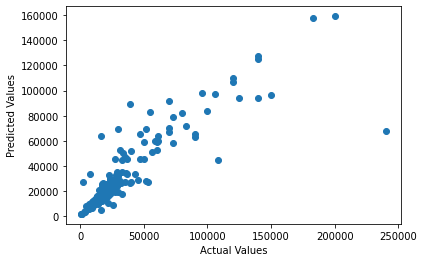

In [39]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()



# References

1. https://www.kaggle.com/code/nguyenthicamlai/software-industry-india-analysis